In [2]:
import face_alignment
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
from PIL import Image
import glob
import math

In [10]:
def draw_output(image, pred):
#     ax = plt.gca()
    implot = plt.imshow(image)
    plt.scatter(pred[0][:,0], pred[0][:,1], c='w', s=3)
    print(pred[0][0], pred[0][5])
    print(pred[0][0][0], pred[0][5][0])
    print(pred[0][0][1], pred[0][5][1])
    l = mlines.Line2D([pred[0][0][0], pred[0][5][0]], [pred[0][0][1], pred[0][5][1]])
    plt.gca().add_line(l)
    plt.show()

In [42]:
def draw_specific_output(image, pred):
    implot = plt.imshow(image)
    plt.scatter(pred[:len(pred),0], pred[:len(pred),1], c='w', s=3)
    print(pred[0], pred[5])
    print(pred[0][0], pred[5][0])
    print(pred[0][1], pred[5][1])
    l = mlines.Line2D([pred[0][0], pred[5][0]], [pred[0][1], pred[5][1]])
    plt.gca().add_line(l)
    plt.show()

In [4]:
def euclidean_distance(p1, p2):
    distance = math.sqrt(math.pow((p1[0] - p2[0]),2) + math.pow((p1[1] - p2[1]),2))
    return distance

In [95]:
def calculate_distances(pred):
    list_distance = []
    for i in pred:
        for j in pred:
            distance = euclidean_distance(i, j)
            list_distance.append(distance)
    return list_distance

### Basic Landmarks Plotting

In [5]:
fa_2d = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cpu')

In [6]:
input_2d_norm = io.imread('images/frontal/normal1.png')
preds_2d_norm = fa_2d.get_landmarks(input_2d_norm)

In [47]:
print("X:\n", preds_2d_norm[0][:,0])
print("Y:\n", preds_2d_norm[0][:,1])

X:
 [392. 398. 404. 410. 421. 445. 469. 504. 552. 599. 623. 641. 670. 688.
 700. 712. 724. 451. 475. 504. 528. 546. 635. 653. 676. 700. 718. 581.
 581. 581. 576. 546. 558. 570. 587. 599. 481. 498. 522. 540. 522. 498.
 623. 647. 664. 676. 664. 641. 504. 528. 558. 570. 581. 605. 617. 599.
 581. 564. 546. 528. 510. 552. 564. 581. 611. 581. 564. 552.]
Y:
 [344. 392. 433. 475. 510. 540. 564. 581. 605. 599. 587. 575. 546. 510.
 475. 439. 398. 303. 291. 285. 291. 303. 315. 315. 315. 327. 344. 362.
 386. 410. 433. 445. 451. 457. 457. 457. 344. 338. 344. 356. 362. 356.
 368. 362. 362. 374. 380. 380. 498. 487. 481. 487. 487. 498. 516. 522.
 528. 528. 522. 516. 498. 498. 498. 504. 516. 504. 504. 498.]


[392. 344.] [445. 540.]
392.0 445.0
344.0 540.0


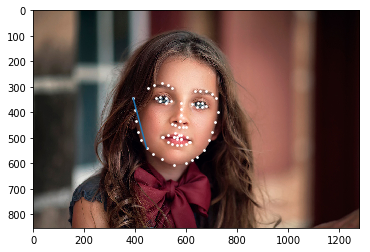

In [11]:
draw_output(input_2d_norm, preds_2d_norm)

In [12]:
input_2d_down = io.imread('images/frontal/downsyndrome1.png')
preds_2d_down = fa_2d.get_landmarks(input_2d_down)

[178. 134.] [220. 270.]
178.0 220.0
134.0 270.0


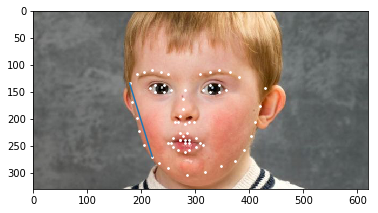

In [13]:
draw_output(input_2d_down, preds_2d_down)

### Extract Features : normal

#### outer

In [34]:
preds_2d_norm_outer = preds_2d_norm[0][:17]
preds_2d_norm_outer

array([[392., 344.],
       [398., 392.],
       [404., 433.],
       [410., 475.],
       [421., 510.],
       [445., 540.],
       [469., 564.],
       [504., 581.],
       [552., 605.],
       [599., 599.],
       [623., 587.],
       [641., 575.],
       [670., 546.],
       [688., 510.],
       [700., 475.],
       [712., 439.],
       [724., 398.]], dtype=float32)

In [48]:
print("X:\n", preds_2d_norm_outer[:len(preds_2d_norm_outer),0])
print("Y:\n", preds_2d_norm_outer[:len(preds_2d_norm_outer),1])

X:
 [392. 398. 404. 410. 421. 445. 469. 504. 552. 599. 623. 641. 670. 688.
 700. 712. 724.]
Y:
 [344. 392. 433. 475. 510. 540. 564. 581. 605. 599. 587. 575. 546. 510.
 475. 439. 398.]


[392. 344.] [445. 540.]
392.0 445.0
344.0 540.0


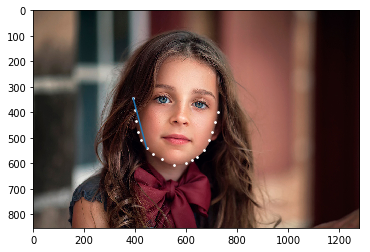

In [49]:
draw_specific_output(input_2d_norm, preds_2d_norm_outer)

#### inner

In [51]:
preds_2d_norm_inner = preds_2d_norm[0][17:]
len(preds_2d_norm_inner)

51

In [52]:
print("X:\n", preds_2d_norm_inner[:len(preds_2d_norm_inner),0])
print("Y:\n", preds_2d_norm_inner[:len(preds_2d_norm_inner),1])

X:
 [451. 475. 504. 528. 546. 635. 653. 676. 700. 718. 581. 581. 581. 576.
 546. 558. 570. 587. 599. 481. 498. 522. 540. 522. 498. 623. 647. 664.
 676. 664. 641. 504. 528. 558. 570. 581. 605. 617. 599. 581. 564. 546.
 528. 510. 552. 564. 581. 611. 581. 564. 552.]
Y:
 [303. 291. 285. 291. 303. 315. 315. 315. 327. 344. 362. 386. 410. 433.
 445. 451. 457. 457. 457. 344. 338. 344. 356. 362. 356. 368. 362. 362.
 374. 380. 380. 498. 487. 481. 487. 487. 498. 516. 522. 528. 528. 522.
 516. 498. 498. 498. 504. 516. 504. 504. 498.]


[451. 303.] [635. 315.]
451.0 635.0
303.0 315.0


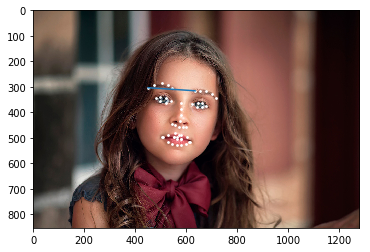

In [53]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner)

#### inner - eyebrows

In [62]:
preds_2d_norm_inner_eyebrows = preds_2d_norm_inner[:10]
print(preds_2d_norm_inner_eyebrows)
print(len(preds_2d_norm_inner_eyebrows))

[[451. 303.]
 [475. 291.]
 [504. 285.]
 [528. 291.]
 [546. 303.]
 [635. 315.]
 [653. 315.]
 [676. 315.]
 [700. 327.]
 [718. 344.]]
10


In [58]:
print("X:\n", preds_2d_norm_inner_eyebrows[:len(preds_2d_norm_inner_eyebrows),0])
print("Y:\n", preds_2d_norm_inner_eyebrows[:len(preds_2d_norm_inner_eyebrows),1])

X:
 [451. 475. 504. 528. 546. 635. 653. 676. 700. 718.]
Y:
 [303. 291. 285. 291. 303. 315. 315. 315. 327. 344.]


[451. 303.] [635. 315.]
451.0 635.0
303.0 315.0


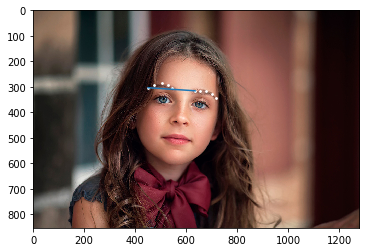

In [59]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_eyebrows)

#### inner - nose

In [64]:
preds_2d_norm_inner_nose = preds_2d_norm_inner[10:19]
print(preds_2d_norm_inner_nose)
print(len(preds_2d_norm_inner_nose))

[[581. 362.]
 [581. 386.]
 [581. 410.]
 [576. 433.]
 [546. 445.]
 [558. 451.]
 [570. 457.]
 [587. 457.]
 [599. 457.]]
9


In [67]:
print("X:\n", preds_2d_norm_inner_nose[:len(preds_2d_norm_inner_nose),0])
print("Y:\n", preds_2d_norm_inner_nose[:len(preds_2d_norm_inner_nose),1])

X:
 [581. 581. 581. 576. 546. 558. 570. 587. 599.]
Y:
 [362. 386. 410. 433. 445. 451. 457. 457. 457.]


[581. 362.] [558. 451.]
581.0 558.0
362.0 451.0


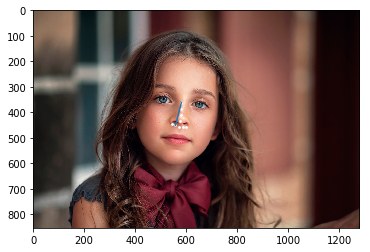

In [68]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_nose)

#### inner - eyes

In [69]:
preds_2d_norm_inner_eyes = preds_2d_norm_inner[19:31]
print(preds_2d_norm_inner_eyes)
print(len(preds_2d_norm_inner_eyes))

[[481. 344.]
 [498. 338.]
 [522. 344.]
 [540. 356.]
 [522. 362.]
 [498. 356.]
 [623. 368.]
 [647. 362.]
 [664. 362.]
 [676. 374.]
 [664. 380.]
 [641. 380.]]
12


In [70]:
print("X:\n", preds_2d_norm_inner_eyes[:len(preds_2d_norm_inner_eyes),0])
print("Y:\n", preds_2d_norm_inner_eyes[:len(preds_2d_norm_inner_eyes),1])

X:
 [481. 498. 522. 540. 522. 498. 623. 647. 664. 676. 664. 641.]
Y:
 [344. 338. 344. 356. 362. 356. 368. 362. 362. 374. 380. 380.]


[481. 344.] [498. 356.]
481.0 498.0
344.0 356.0


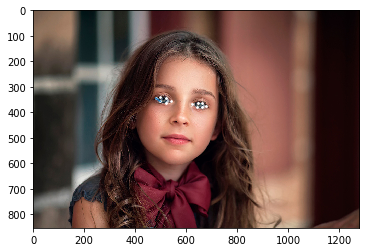

In [71]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_eyes)

#### inner - mouth

In [72]:
preds_2d_norm_inner_mouth = preds_2d_norm_inner[31:]
print(preds_2d_norm_inner_mouth)
print(len(preds_2d_norm_inner_mouth))

[[504. 498.]
 [528. 487.]
 [558. 481.]
 [570. 487.]
 [581. 487.]
 [605. 498.]
 [617. 516.]
 [599. 522.]
 [581. 528.]
 [564. 528.]
 [546. 522.]
 [528. 516.]
 [510. 498.]
 [552. 498.]
 [564. 498.]
 [581. 504.]
 [611. 516.]
 [581. 504.]
 [564. 504.]
 [552. 498.]]
20


In [73]:
print("X:\n", preds_2d_norm_inner_mouth[:len(preds_2d_norm_inner_mouth),0])
print("Y:\n", preds_2d_norm_inner_mouth[:len(preds_2d_norm_inner_mouth),1])

X:
 [504. 528. 558. 570. 581. 605. 617. 599. 581. 564. 546. 528. 510. 552.
 564. 581. 611. 581. 564. 552.]
Y:
 [498. 487. 481. 487. 487. 498. 516. 522. 528. 528. 522. 516. 498. 498.
 498. 504. 516. 504. 504. 498.]


[504. 498.] [605. 498.]
504.0 605.0
498.0 498.0


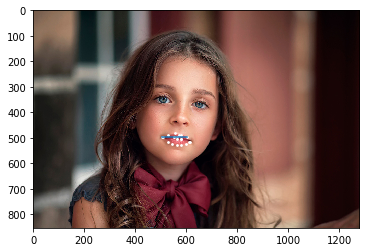

In [74]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_mouth)

### Extract Features : down syndrome

#### outer

In [75]:
preds_2d_down_outer = preds_2d_down[0][:17]
print(preds_2d_down_outer)
print(len(preds_2d_down_outer))

[[178. 134.]
 [182. 168.]
 [191. 198.]
 [195. 223.]
 [204. 249.]
 [220. 270.]
 [233. 282.]
 [250. 291.]
 [284. 304.]
 [318. 299.]
 [347. 287.]
 [373. 278.]
 [390. 257.]
 [403. 232.]
 [411. 206.]
 [419. 177.]
 [428. 143.]]
17


In [76]:
print("X:\n", preds_2d_down_outer[:len(preds_2d_down_outer),0])
print("Y:\n", preds_2d_down_outer[:len(preds_2d_down_outer),1])

X:
 [178. 182. 191. 195. 204. 220. 233. 250. 284. 318. 347. 373. 390. 403.
 411. 419. 428.]
Y:
 [134. 168. 198. 223. 249. 270. 282. 291. 304. 299. 287. 278. 257. 232.
 206. 177. 143.]


[178. 134.] [220. 270.]
178.0 220.0
134.0 270.0


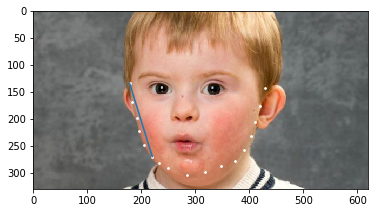

In [77]:
draw_specific_output(input_2d_down, preds_2d_down_outer)

#### inner

In [78]:
preds_2d_down_inner = preds_2d_down[0][17:]
print(preds_2d_down_inner)
print(len(preds_2d_down_inner))

[[191. 117.]
 [204. 113.]
 [220. 109.]
 [237. 113.]
 [250. 117.]
 [309. 117.]
 [326. 113.]
 [343. 109.]
 [364. 113.]
 [381. 122.]
 [280. 147.]
 [276. 164.]
 [276. 181.]
 [271. 194.]
 [263. 206.]
 [267. 206.]
 [280. 210.]
 [288. 206.]
 [297. 206.]
 [216. 143.]
 [225. 138.]
 [242. 138.]
 [254. 147.]
 [242. 151.]
 [225. 151.]
 [314. 147.]
 [326. 138.]
 [343. 138.]
 [356. 147.]
 [343. 151.]
 [326. 151.]
 [250. 244.]
 [259. 236.]
 [271. 227.]
 [276. 232.]
 [284. 227.]
 [301. 236.]
 [314. 249.]
 [301. 253.]
 [288. 257.]
 [280. 261.]
 [267. 257.]
 [259. 253.]
 [254. 244.]
 [271. 240.]
 [280. 240.]
 [288. 240.]
 [309. 244.]
 [288. 244.]
 [280. 244.]
 [271. 240.]]
51


In [79]:
print("X:\n", preds_2d_down_inner[:len(preds_2d_down_inner),0])
print("Y:\n", preds_2d_down_inner[:len(preds_2d_down_inner),1])

X:
 [191. 204. 220. 237. 250. 309. 326. 343. 364. 381. 280. 276. 276. 271.
 263. 267. 280. 288. 297. 216. 225. 242. 254. 242. 225. 314. 326. 343.
 356. 343. 326. 250. 259. 271. 276. 284. 301. 314. 301. 288. 280. 267.
 259. 254. 271. 280. 288. 309. 288. 280. 271.]
Y:
 [117. 113. 109. 113. 117. 117. 113. 109. 113. 122. 147. 164. 181. 194.
 206. 206. 210. 206. 206. 143. 138. 138. 147. 151. 151. 147. 138. 138.
 147. 151. 151. 244. 236. 227. 232. 227. 236. 249. 253. 257. 261. 257.
 253. 244. 240. 240. 240. 244. 244. 244. 240.]


[191. 117.] [309. 117.]
191.0 309.0
117.0 117.0


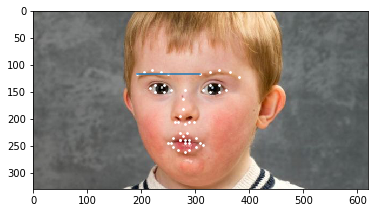

In [80]:
draw_specific_output(input_2d_down, preds_2d_down_inner)

#### inner - eyebrows

In [81]:
preds_2d_down_inner_eyebrows = preds_2d_down_inner[:10]
print(preds_2d_down_inner_eyebrows)
print(len(preds_2d_down_inner_eyebrows))

[[191. 117.]
 [204. 113.]
 [220. 109.]
 [237. 113.]
 [250. 117.]
 [309. 117.]
 [326. 113.]
 [343. 109.]
 [364. 113.]
 [381. 122.]]
10


In [82]:
print("X:\n", preds_2d_down_inner_eyebrows[:len(preds_2d_down_inner_eyebrows),0])
print("Y:\n", preds_2d_down_inner_eyebrows[:len(preds_2d_down_inner_eyebrows),1])

X:
 [191. 204. 220. 237. 250. 309. 326. 343. 364. 381.]
Y:
 [117. 113. 109. 113. 117. 117. 113. 109. 113. 122.]


[191. 117.] [309. 117.]
191.0 309.0
117.0 117.0


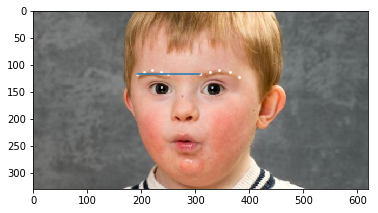

In [83]:
draw_specific_output(input_2d_down, preds_2d_down_inner_eyebrows)

#### inner - nose

In [86]:
preds_2d_down_inner_nose = preds_2d_down_inner[10:19]
print(preds_2d_down_inner_nose)
print(len(preds_2d_down_inner_nose))

[[280. 147.]
 [276. 164.]
 [276. 181.]
 [271. 194.]
 [263. 206.]
 [267. 206.]
 [280. 210.]
 [288. 206.]
 [297. 206.]]
9


In [87]:
print("X:\n", preds_2d_down_inner_nose[:len(preds_2d_down_inner_nose),0])
print("Y:\n", preds_2d_down_inner_nose[:len(preds_2d_down_inner_nose),1])

X:
 [280. 276. 276. 271. 263. 267. 280. 288. 297.]
Y:
 [147. 164. 181. 194. 206. 206. 210. 206. 206.]


[280. 147.] [267. 206.]
280.0 267.0
147.0 206.0


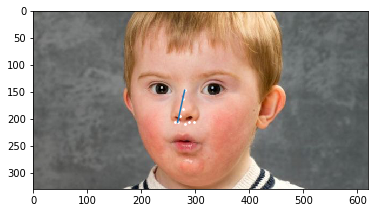

In [88]:
draw_specific_output(input_2d_down, preds_2d_down_inner_nose)

#### inner - eyes

In [89]:
preds_2d_down_inner_eyes = preds_2d_down_inner[19:31]
print(preds_2d_down_inner_eyes)
print(len(preds_2d_down_inner_eyes))

[[216. 143.]
 [225. 138.]
 [242. 138.]
 [254. 147.]
 [242. 151.]
 [225. 151.]
 [314. 147.]
 [326. 138.]
 [343. 138.]
 [356. 147.]
 [343. 151.]
 [326. 151.]]
12


In [90]:
print("X:\n", preds_2d_down_inner_eyes[:len(preds_2d_down_inner_eyes),0])
print("Y:\n", preds_2d_down_inner_eyes[:len(preds_2d_down_inner_eyes),1])

X:
 [216. 225. 242. 254. 242. 225. 314. 326. 343. 356. 343. 326.]
Y:
 [143. 138. 138. 147. 151. 151. 147. 138. 138. 147. 151. 151.]


[216. 143.] [225. 151.]
216.0 225.0
143.0 151.0


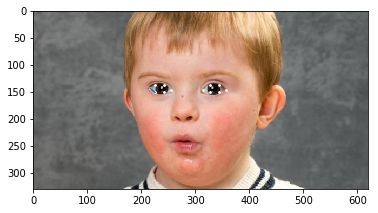

In [91]:
draw_specific_output(input_2d_down, preds_2d_down_inner_eyes)

#### inner - mouth

In [92]:
preds_2d_down_inner_mouth = preds_2d_down_inner[31:]
print(preds_2d_down_inner_mouth)
print(len(preds_2d_down_inner_mouth))

[[250. 244.]
 [259. 236.]
 [271. 227.]
 [276. 232.]
 [284. 227.]
 [301. 236.]
 [314. 249.]
 [301. 253.]
 [288. 257.]
 [280. 261.]
 [267. 257.]
 [259. 253.]
 [254. 244.]
 [271. 240.]
 [280. 240.]
 [288. 240.]
 [309. 244.]
 [288. 244.]
 [280. 244.]
 [271. 240.]]
20


In [93]:
print("X:\n", preds_2d_down_inner_mouth[:len(preds_2d_down_inner_mouth),0])
print("Y:\n", preds_2d_down_inner_mouth[:len(preds_2d_down_inner_mouth),1])

X:
 [250. 259. 271. 276. 284. 301. 314. 301. 288. 280. 267. 259. 254. 271.
 280. 288. 309. 288. 280. 271.]
Y:
 [244. 236. 227. 232. 227. 236. 249. 253. 257. 261. 257. 253. 244. 240.
 240. 240. 244. 244. 244. 240.]


[250. 244.] [301. 236.]
250.0 301.0
244.0 236.0


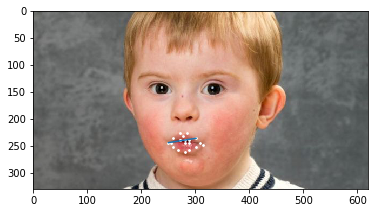

In [94]:
draw_specific_output(input_2d_down, preds_2d_down_inner_mouth)

### Extract Features : distances between landmarks

In [96]:
#### outer
list_distance_outer = calculate_distances(preds_2d_down_outer)
print(list_distance_outer)
print(len(list_distance_outer))

[0.0, 34.23448553724738, 65.30696746902278, 90.60905032059435, 117.90250209389112, 142.33762678926468, 157.88920165736477, 172.72232050317064, 200.33971149025845, 216.390850083824, 227.96929617823537, 242.40668307618913, 245.0979396078229, 245.41597340026587, 243.87086746883074, 244.80604567698077, 250.1619475459847, 34.23448553724738, 0.0, 31.32091952673165, 56.515484603779164, 83.93449827097318, 108.84851859350222, 124.88794977899188, 140.54536634126364, 170.0, 188.83061192507955, 203.43549346168678, 220.41097976280582, 226.24102192131292, 230.08042072284204, 232.13142829009604, 237.17082451262846, 247.2670621008791, 65.30696746902278, 31.32091952673165, 0.0, 25.317977802344327, 52.630789467763066, 77.62087348130012, 93.91485505499116, 110.13627921806692, 141.01418368376991, 162.265215003093, 179.60233851484227, 198.80643852752857, 207.56203891848818, 214.7091055358389, 220.14540649307222, 228.96506283710622, 243.29817097545143, 90.60905032059435, 56.515484603779164, 25.3179778023443

In [ ]:
#### inner

In [ ]:
#### outer-inner

In [ ]:
#### outer-inner(eyebrows)

In [ ]:
#### outer-inner(eyes)

In [ ]:
#### outer-inner(nose)

In [ ]:
#### outer-inner(mouth)

In [ ]:
#### inner-inner

In [ ]:
#### inner-inner (eyebrows-eyes)

In [ ]:
#### inner-inner (eyes-nose)

In [ ]:
#### inner-inner (eyes-mouth)

In [ ]:
#### inner-inner (nose-mouth)

In [ ]:
#### inner-inner (left eyes-right eyes)

In [35]:
len(preds_2d[0])

68

In [61]:
list_distance = []
for i in preds_2d[0]:
    for j in preds_2d[0]:
        distance = euclidean_distance(i, j)
        list_distance.append(distance)
list_distance[:40]

[0.0,
 34.23448553724738,
 65.30696746902278,
 90.60905032059435,
 117.90250209389112,
 142.33762678926468,
 157.88920165736477,
 172.72232050317064,
 200.33971149025845,
 216.390850083824,
 227.96929617823537,
 242.40668307618913,
 245.0979396078229,
 245.41597340026587,
 243.87086746883074,
 244.80604567698077,
 250.1619475459847,
 21.400934559032695,
 33.421549934136806,
 48.877397639399746,
 62.625873247404705,
 73.97972695272672,
 132.09844813622905,
 149.4824404403407,
 166.88319268278636,
 187.18172987767795,
 203.35437049643167,
 102.82509421342633,
 102.48902380255166,
 108.6876257906115,
 110.6752004741803,
 111.39569111954016,
 114.47707194019246,
 127.20062892926276,
 131.46862743635836,
 139.08630414242805,
 39.05124837953327,
 47.16990566028302,
 64.1248781675256,
 77.10382610480494]

In [ ]:
list_distance = []
for i in range(0,20):
    for j in range(0,20):
        distance = euclidean_distance(preds_2d[0][i], preds_2d[0][j])
        print(preds_2d[0][i])
        print(preds_2d[0][j])
        print(distance)
        list_distance.append(distance)
# list_distance[:40]

[178. 134.]
[178. 134.]
0.0
[178. 134.]
[182. 168.]
34.23448553724738
[178. 134.]
[191. 198.]
65.30696746902278
[178. 134.]
[195. 223.]
90.60905032059435
[178. 134.]
[204. 249.]
117.90250209389112
[178. 134.]
[220. 270.]
142.33762678926468
[178. 134.]
[233. 282.]
157.88920165736477
[178. 134.]
[250. 291.]
172.72232050317064
[178. 134.]
[284. 304.]
200.33971149025845
[178. 134.]
[318. 299.]
216.390850083824
[178. 134.]
[347. 287.]
227.96929617823537
[178. 134.]
[373. 278.]
242.40668307618913
[178. 134.]
[390. 257.]
245.0979396078229
[178. 134.]
[403. 232.]
245.41597340026587
[178. 134.]
[411. 206.]
243.87086746883074
[178. 134.]
[419. 177.]
244.80604567698077
[178. 134.]
[428. 143.]
250.1619475459847
[178. 134.]
[191. 117.]
21.400934559032695
[178. 134.]
[204. 113.]
33.421549934136806
[178. 134.]
[220. 109.]
48.877397639399746
[182. 168.]
[178. 134.]
34.23448553724738
[182. 168.]
[182. 168.]
0.0
[182. 168.]
[191. 198.]
31.32091952673165
[182. 168.]
[195. 223.]
56.515484603779164
[182. 1

In [4]:
input_2d = io.imread('images/outdoor_184.png')
preds_2d = fa_2d.get_landmarks(input_2d)

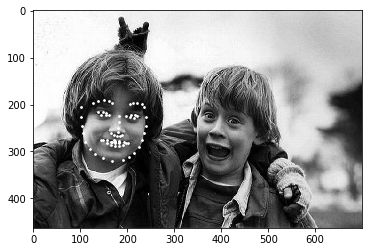

In [9]:
draw_output(input_2d, preds_2d)

In [4]:
fa_3d = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False)

In [12]:
input_3d = io.imread('images/outdoor_180.png')
pred_3d = fa_3d.get_landmarks(input_3d)

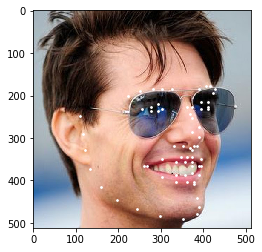

In [13]:
draw_output(input_3d, pred_3d)

In [26]:
preds = fa_2d.get_landmarks_from_directory('images/frontal')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.52it/s]


In [9]:
for filename in glob.glob('images/frontal/*.jpg'): #assuming gif
    im = Image.open(filename)
    img = io.imread(filename)
    pred = fa_2d.get_landmarks(img)
    draw_output(img, pred)

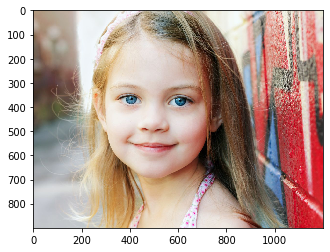

In [16]:
plt.imshow(image_list[0])